In [1]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By

# Set up the Chrome web browser
browser = webdriver.Chrome()
browser.maximize_window()  # Maximize the browser window

In [3]:
# URL of the Naver Finance Market Capitalization Ranking page
url = 'https://finance.naver.com/sise/sise_market_sum.naver?&page='
browser.get(url)

In [4]:
#Reset the selected checkboxes (uncheck all)
checkboxes = browser.find_elements(By.NAME, 'fieldIds')
for checkbox in checkboxes:
    if checkbox.is_selected(): # If the checkbox is selected?
        checkbox.click() # Click to uncheck

In [5]:
#Set the desired data fields to be selected
items_to_select = ['시가총액', '거래량', '영업이익', '외국인비율', 'ROE', '상장주식수']
for checkbox in checkboxes:
    parent = checkbox.find_element(By.XPATH, '..') # Parent element
    label = parent.find_element(By.TAG_NAME, 'label')
    print(label.text)
    if label.text in items_to_select: # If the label matches the desired data field
        checkbox.click() # Check the checkbox

거래량
매수호가
거래대금
시가총액
영업이익
PER
시가
매도호가
전일거래량
자산총계
영업이익증가율
ROE
고가
매수총잔량
외국인비율
부채총계
당기순이익
ROA
저가
매도총잔량
상장주식수
매출액
주당순이익
PBR
매출액증가율
보통주배당금
유보율


In [6]:
#Click the Apply button
btn_apply = browser.find_element(By.XPATH, '//a[@href="javascript:fieldSubmit()"]')
btn_apply.click()

In [7]:
#Iterate through pages 1 to 39 for data extraction
for idx in range(1, 40): 
    # Preparatory step: Navigate to the page
    browser.get(url + str(idx)) 

    # Extract data from the HTML table
    df = pd.read_html(browser.page_source)[1]
    df.dropna(axis='index', how='all', inplace=True)
    df.dropna(axis='columns', how='all', inplace=True)
    if len(df) == 0: #If there is no more data to extract
        break

    # Save data to a CSV file
    f_name = 'Marcap.csv'
    if os.path.exists(f_name): #If the file exists, append data without headers
        df.to_csv(f_name, encoding='utf-8-sig', index=False, mode='a', header=False)
    else: #If the file doesn't exist, create a new file with headers
        df.to_csv(f_name, encoding='utf-8-sig', index=False)
    print(f'{idx} Complete the page')

#Close the browser
browser.quit()

1 Complete the page
2 Complete the page
3 Complete the page
4 Complete the page
5 Complete the page
6 Complete the page
7 Complete the page
8 Complete the page
9 Complete the page
10 Complete the page
11 Complete the page
12 Complete the page
13 Complete the page
14 Complete the page
15 Complete the page
16 Complete the page
17 Complete the page
18 Complete the page
19 Complete the page
20 Complete the page
21 Complete the page
22 Complete the page
23 Complete the page
24 Complete the page
25 Complete the page
26 Complete the page
27 Complete the page
28 Complete the page
29 Complete the page
30 Complete the page
31 Complete the page
32 Complete the page
33 Complete the page
34 Complete the page
35 Complete the page
36 Complete the page
37 Complete the page
38 Complete the page
39 Complete the page


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc

# Set Korean font
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Load the dataset
file_path = 'Marcap.csv'
df = pd.read_csv(file_path)

print("============ columns ============")
print(df.columns)
print()

# Rename columns for better readability
df.columns = ['N', 'Name', 'CurrentPrice', 'Changes', 'FluctuationRate',
                    'ParValue', 'Volume', 'Stocks', 'Marcap', 'OperatingRate', 'ForeignRate', 'ROE']

# Display basic information
print("============ head ============")
print(df.head())
print()
print("============ describe ============")
print(df.describe())
print()
print("============ Is null ============")
print(df.isnull().sum())
print()
print(df.isnull().mean() * 100)

============ columns ============
Index(['N', '종목명', '현재가', '전일비', '등락률', '액면가', '거래량', '상장주식수', '시가총액', '영업이익',
       '외국인비율', 'ROE'],
      dtype='object')

============ head ============
     N      Name  CurrentPrice  Changes FluctuationRate  ParValue      Volume  \
0  1.0      삼성전자       74000.0   1200.0          -1.60%     100.0  12691620.0   
1  2.0    SK하이닉스      141500.0    700.0          +0.50%    5000.0   2564919.0   
2  3.0  LG에너지솔루션      380500.0   7000.0          +1.87%     500.0    216480.0   
3  4.0  삼성바이오로직스      788000.0  11000.0          -1.38%    2500.0     85172.0   
4  5.0     삼성전자우       60600.0      0.0           0.00%     100.0    886388.0   

      Stocks     Marcap  OperatingRate  ForeignRate    ROE  
0  5969783.0  4417639.0       433766.0        54.34  17.07  
1   728002.0  1030123.0        68094.0        53.26   3.56  
2   234000.0   890370.0        12137.0         4.82   5.75  
3    71174.0   560851.0         9836.0        10.95  11.42  
4   822887.0   49

Text(0.5, 1.0, 'Foreign Ownership Ratio vs ROE')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


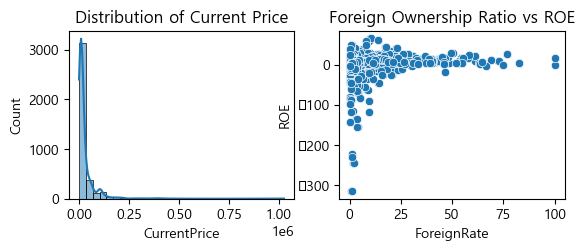

In [9]:
# Distribution of 'CurrentPrice'
plt.subplot(2, 2, 1)
sns.histplot(df['CurrentPrice'], bins=30, kde=True)
plt.title('Distribution of Current Price')

# Scatter plot of 'ForeignRate' and 'ROE'
plt.subplot(2, 2, 2)
sns.scatterplot(x='ForeignRate', y='ROE', data=df)
plt.title('Foreign Ownership Ratio vs ROE')

In [10]:
# Basic statistical measures
mean_price = df['CurrentPrice'].mean()
median_price = df['CurrentPrice'].median()
std_dev_price = df['CurrentPrice'].std()

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation of Price: {std_dev_price}")

Mean Price: 28933.646153846155
Median Price: 11682.5
Standard Deviation of Price: 59013.582147297195


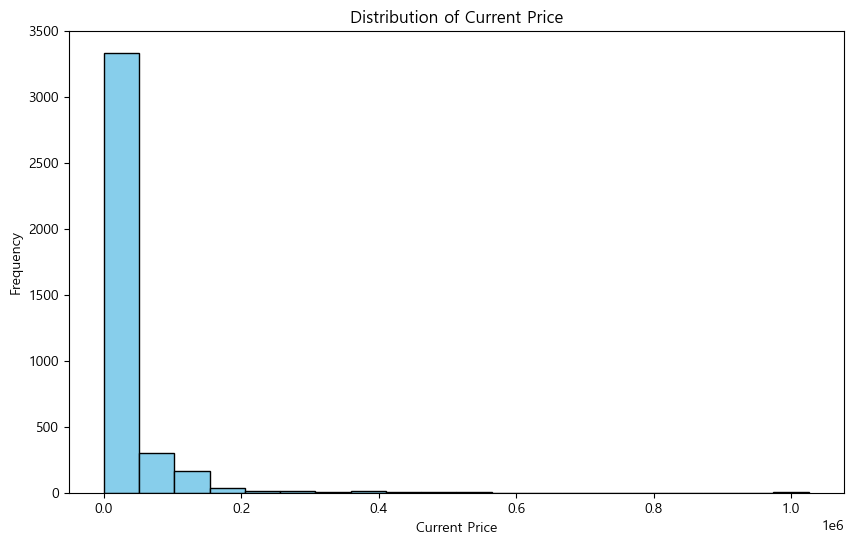

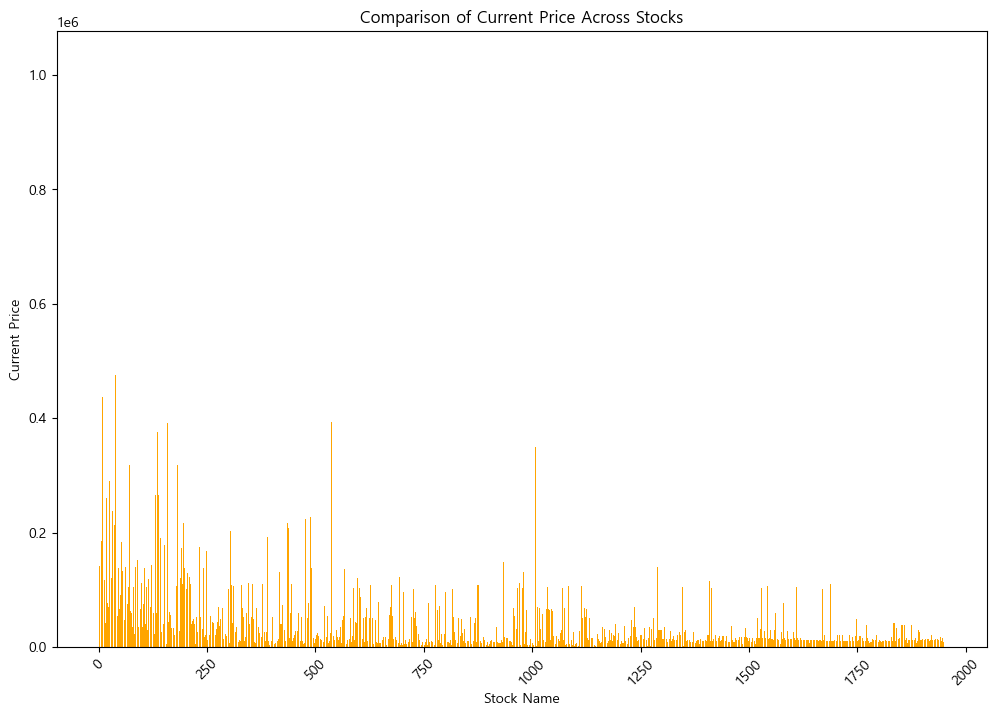

In [11]:
# Visualizations
# 1Histogram showing the distribution of 'CurrentPrice'
plt.figure(figsize=(10, 6))
plt.hist(df['CurrentPrice'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Current Price')
plt.ylabel('Frequency')
plt.title('Distribution of Current Price')
plt.show()

# Bar chart comparing 'CurrentPrice' across different 'Name'
plt.figure(figsize=(12, 8))
plt.bar(df['N'], df['CurrentPrice'], color='orange')
plt.xlabel('Stock Name')
plt.ylabel('Current Price')
plt.title('Comparison of Current Price Across Stocks')
plt.xticks(rotation=45)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


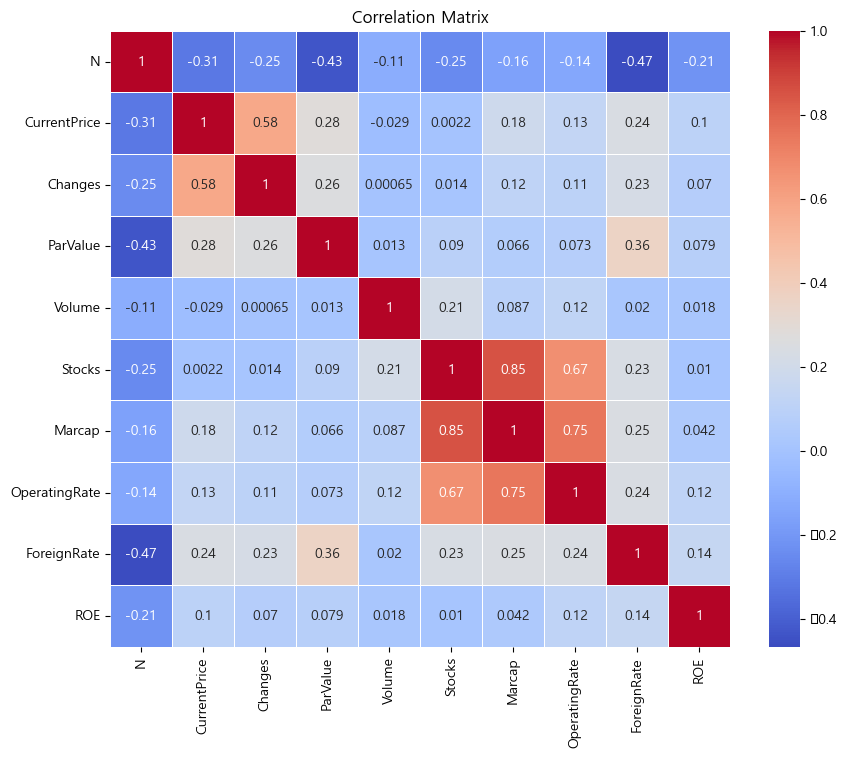

In [12]:
# Heatmap of the correlation matrix
correlation_matrix = df.corr()

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

#Interpretation:
    #Positive correlation: Values close to 1
    #Negative correlation: Values close to -1
    #Weak/no correlation: Values close to 0

In [13]:
# Portfolio Composition Example
portfolio = df[['Name', 'FluctuationRate', 'Stocks', 'Marcap', 'OperatingRate', 'ROE']]
portfolio = portfolio.sort_values(by='Marcap', ascending=False).head(10)
print("Top 10 Stocks for Portfolio:")
print(portfolio)

Top 10 Stocks for Portfolio:
          Name FluctuationRate     Stocks     Marcap  OperatingRate    ROE
0         삼성전자          -1.60%  5969783.0  4417639.0       433766.0  17.07
1950      삼성전자          +1.24%  5969783.0  4393760.0       433766.0  17.07
1       SK하이닉스          +0.50%   728002.0  1030123.0        68094.0   3.56
1951    SK하이닉스          -1.48%   728002.0   966059.0        68094.0   3.56
1952  LG에너지솔루션          +0.13%   234000.0   892710.0        12137.0   5.75
2     LG에너지솔루션          +1.87%   234000.0   890370.0        12137.0   5.75
1953  삼성바이오로직스          -1.31%    71174.0   590032.0         9836.0  11.42
3     삼성바이오로직스          -1.38%    71174.0   560851.0         9836.0  11.42
4        삼성전자우           0.00%   822887.0   498669.0            NaN    NaN
1954     삼성전자우          +1.70%   822887.0   491263.0            NaN    NaN


Text(0.5, 1.0, 'Relationship between Foreign Ownership Ratio and ROE')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


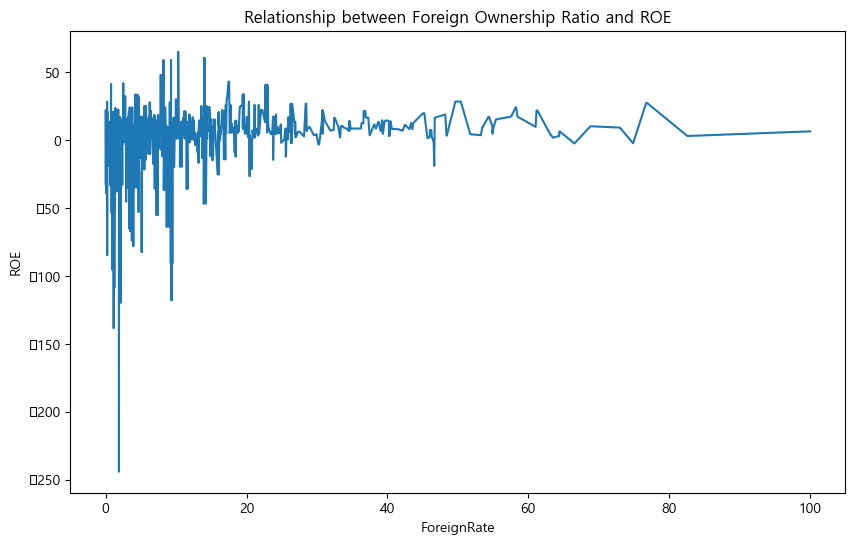

In [14]:
# Analysis of the Relationship between Foreign Ownership Ratio and Profitability
# Line plot showing the relationship between 'ForeignRate' and 'ROE'
plt.figure(figsize=(10, 6))
sns.lineplot(x='ForeignRate', y='ROE', data=df, ci=None)
plt.title('Relationship between Foreign Ownership Ratio and ROE')

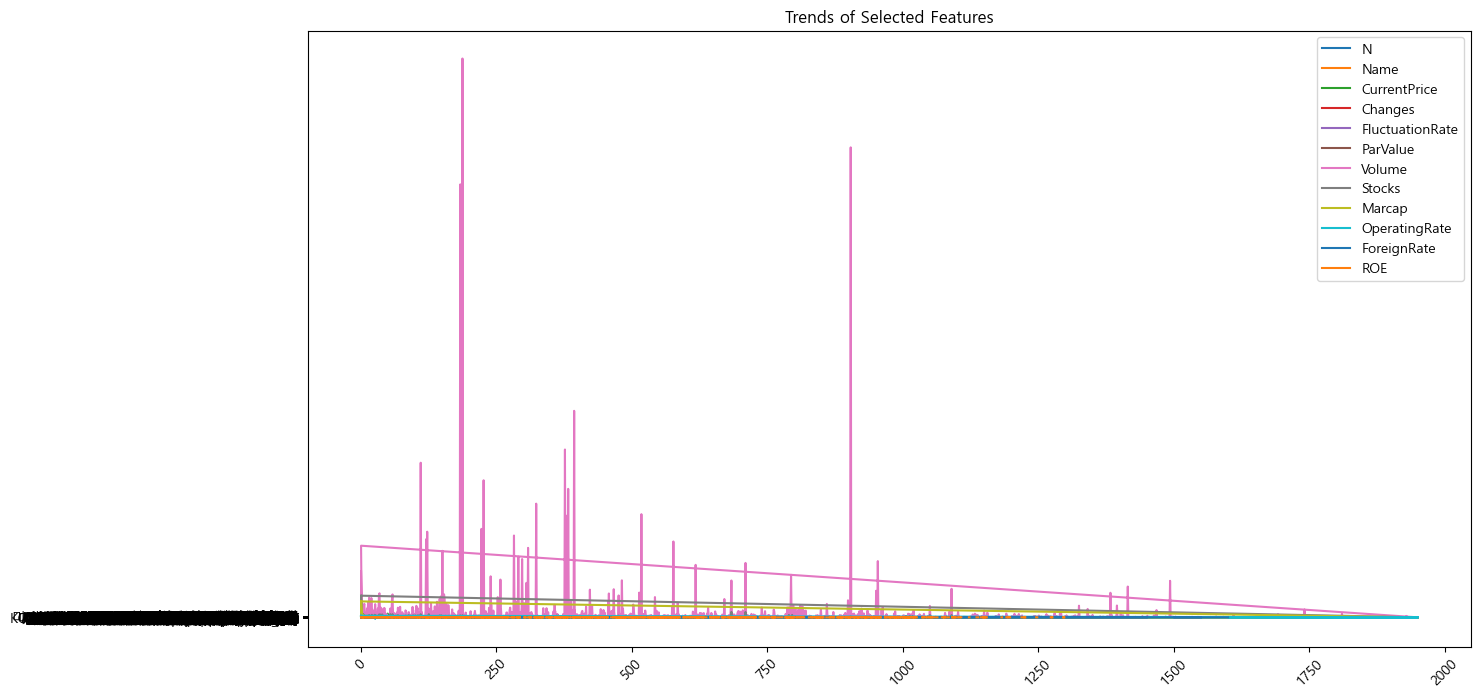

In [15]:
#Trends of Selected Features
plt.figure(figsize=(15, 8))
for feature in df:
    plt.plot(df['N'], df[feature], label=feature)

plt.xticks(rotation=45)
plt.legend()
plt.title('Trends of Selected Features')
plt.show()

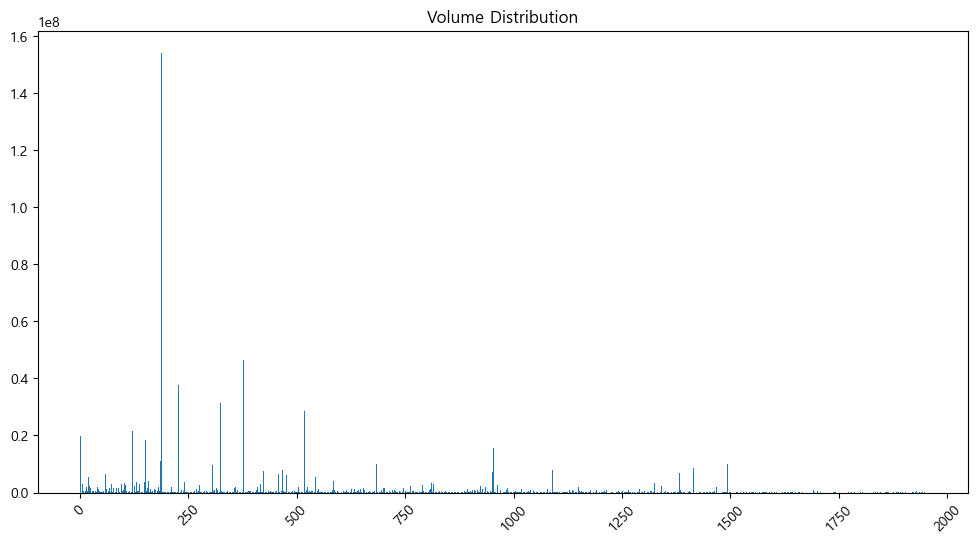

In [16]:
#Bar chart of 'Volume' Distribution
plt.figure(figsize=(12, 6))
plt.bar(df['N'], df['Volume'])
plt.xticks(rotation=45)
plt.title('Volume Distribution')
plt.show()

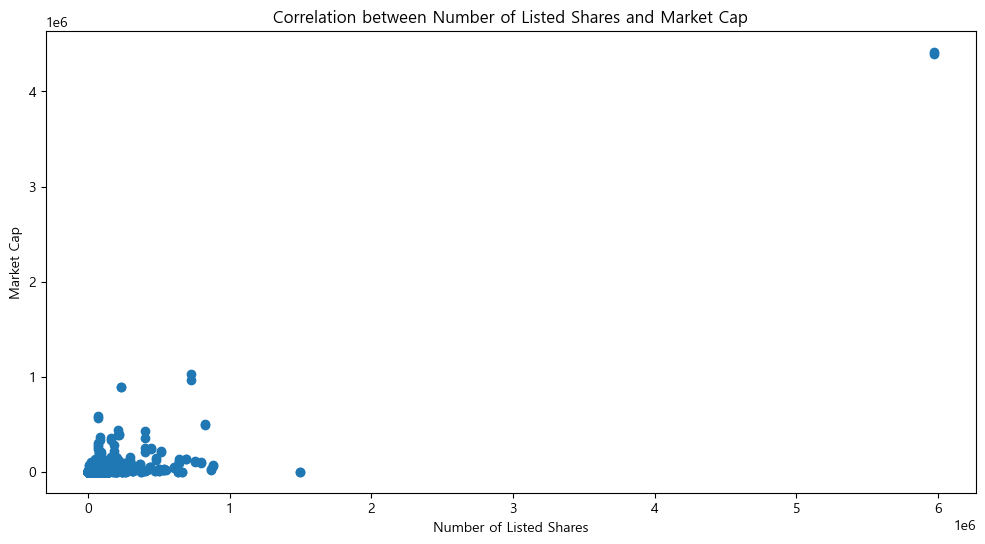

In [17]:
#Scatter plot showing the correlation between 'Stocks' and 'Marcap'
plt.figure(figsize=(12, 6))
plt.scatter(df['Stocks'], df['Marcap'])
plt.xlabel('Number of Listed Shares')
plt.ylabel('Market Cap')
plt.title('Correlation between Number of Listed Shares and Market Cap')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


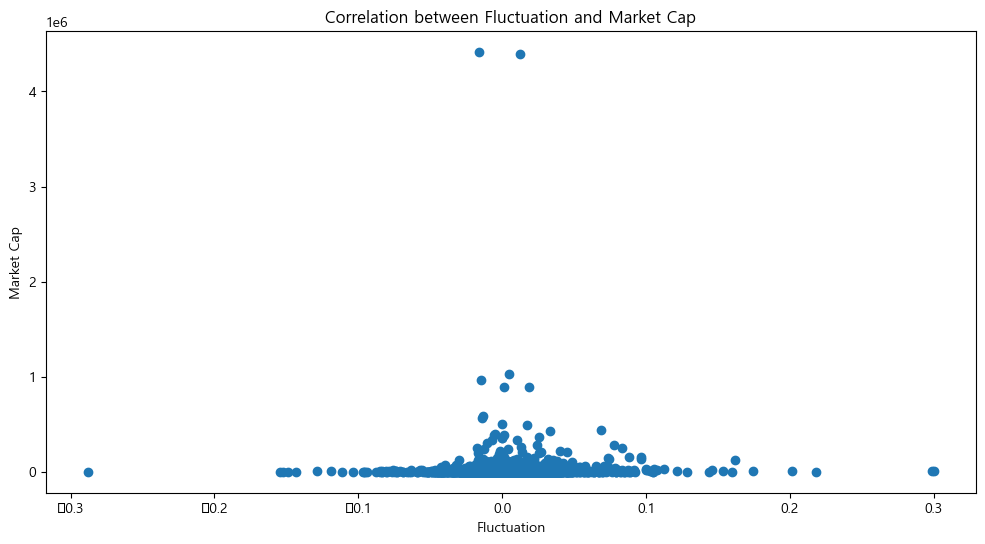

In [18]:
#Scatter plot showing the correlation between 'FluctuationRate' and 'Marcap'
plt.figure(figsize=(12, 6))
plt.scatter(df['FluctuationRate'].str.rstrip('%').astype('float') / 100, df['Marcap'])
plt.xlabel('Fluctuation')
plt.ylabel('Market Cap')
plt.title('Correlation between Fluctuation and Market Cap')
plt.show()